[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alikn/coding_for_analytics/blob/main/pandas/7_plotting.ipynb)

# Introduction

Visualizing the data makes it much more digestable and helps storytelling with the data significantly. It is important to use a stuitable type of chart for conveying an insight.

![](https://www.tapclicks.com/wp-content/uploads/How-to-Visualize-your-Data-with-Charts-and-Graphs.jpg)

`matplotlib` is a Python library that allows us to make differnt types of charts. While we can use `matplotlib` direcly, it is also possible using it through other libraries which facilitate that. 

# Creating charts with Pandas

Pandas has a *plot* method which uses matplotlib under the hood to create charts. Take a look at [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for all the different types of charts that it can handle.

In [4]:
import pandas as pd
# Even when we plot with other libraries, we still need to import matplotlib 
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 5)
reviews = pd.read_csv("https://alik-courses.web.app/coding-for-analytics/winemag-data-130k-v2.csv", index_col=0)

In [6]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Line chart
Example: creating a chart which shows the minimum price of wines for each point.

In [12]:
min_price_for_point = reviews.groupby("points").price.min().to_frame().reset_index()

min_price_for_point

,points,price
0,80,5.0
1,81,5.0
...,...,...
19,99,44.0
20,100,80.0


<AxesSubplot: xlabel='points'>

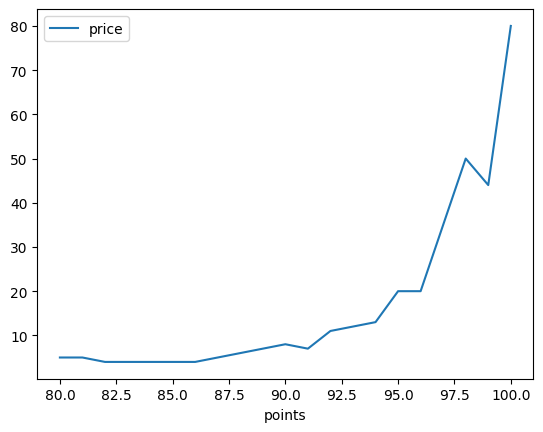

In [54]:
min_price_for_point.plot(kind='line', x='points', y='price')

## Bar chart
Example: create a bar chart which compares the average points of most popular wines.

In [30]:
most_popular_wines = ['Cabernet Sauvignon', 'Merlot', 'Pinot Noir', 'Chardonnay', 'Tempranillo', 'Syrah',
       'Rosé']
# Filter the dataframe to include only the most popular wines
most_popular_wines_reviews = reviews[reviews.variety.isin(most_popular_wines)]
most_popular_wines_reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129963,Israel,"A bouquet of black cherry, tart cranberry and ...",Oak Aged,90,20.0,Galilee,NaN,NaN,Mike DeSimone,@worldwineguys,Dalton 2012 Oak Aged Cabernet Sauvignon (Galilee),Cabernet Sauvignon,Dalton
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation


In [33]:
most_popular_wines_points = most_popular_wines_reviews.groupby('variety').points.mean().to_frame().reset_index()
most_popular_wines_points

,variety,points
0,Cabernet Sauvignon,88.607580
1,Chardonnay,88.340083
...,...,...
5,Syrah,89.286577
6,Tempranillo,87.514365


<AxesSubplot: xlabel='variety'>

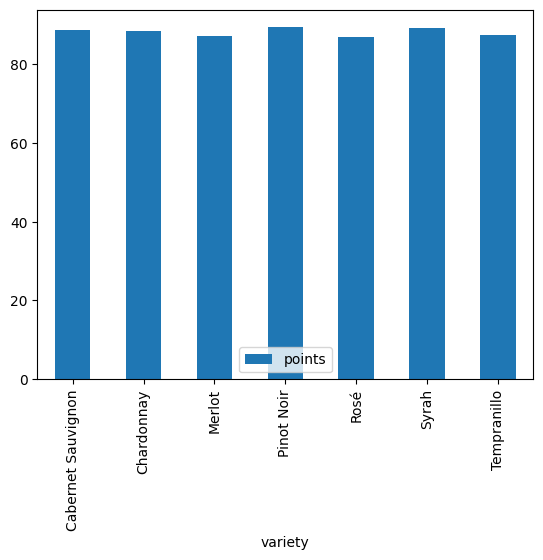

In [34]:
most_popular_wines_points.plot(kind='bar', x='variety', y='points')

<AxesSubplot: xlabel='variety'>

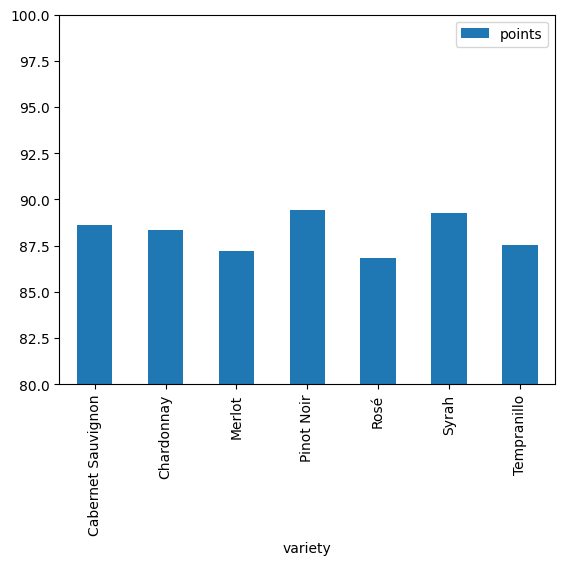

In [36]:
most_popular_wines_points.plot(kind='bar', x='variety', y='points', ylim=(80, 100))

### Exercise
Create a chart of average price for popular types of wines.

In [ ]:
# Add your code here

## Histogram
Example: create a chart for the distribution of points in the review.

<AxesSubplot: ylabel='Frequency'>

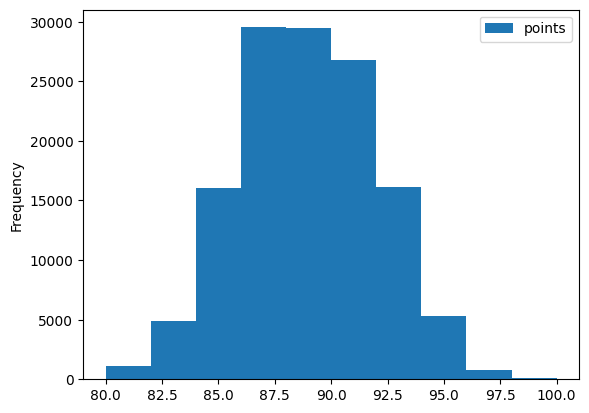

In [44]:
reviews.plot(kind='hist', y='points')

<AxesSubplot: ylabel='Frequency'>

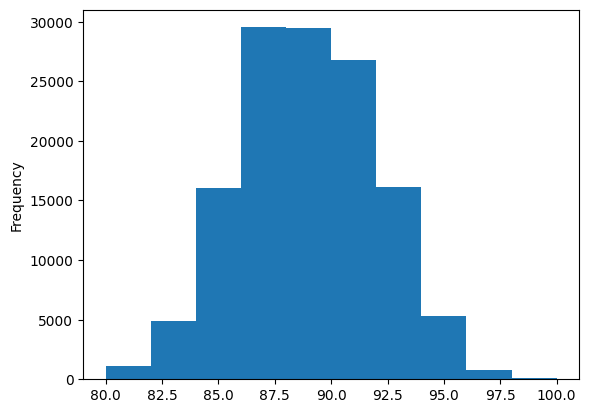

In [39]:
# This is equivalent to the above
reviews.points.plot(kind="hist")

Example: create a chart for price of wines in the reviews dataframe.

<AxesSubplot: ylabel='Frequency'>

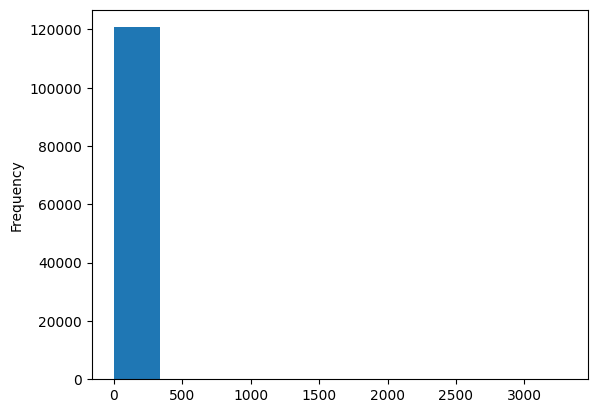

In [40]:
reviews.price.plot(kind="hist")

The above chart shows that the vast majority of wines are less than $500 with a few exceptions which go up to $3000.

<AxesSubplot: ylabel='Frequency'>

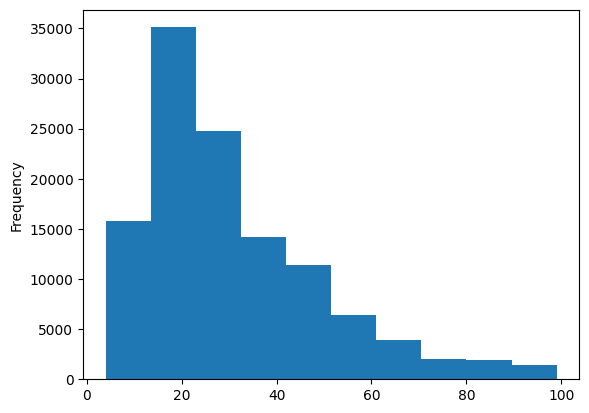

In [41]:
# Filtering the wines to only include under $100 wines.
reviews[reviews.price < 100].price.plot(kind="hist")

### Exercise
Create a chart which shows the distribution of points for wines under $100. Is the distribution any different compared to the histogram for all wines?

In [ ]:
# Add your code here

## Scatter plot
Scatter plot are good for visualizing the relationship between two numerical columns. 

Example: create a scatter plot which shows the relationship between price and number of points.

<AxesSubplot: xlabel='price', ylabel='points'>

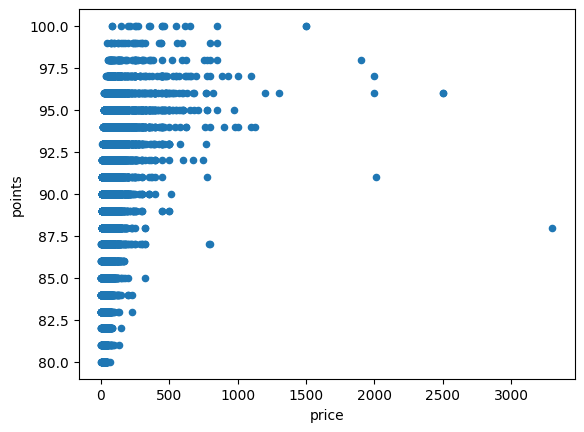

In [45]:
reviews.plot(kind="scatter", x="price", y="points")

<AxesSubplot: xlabel='points', ylabel='price'>

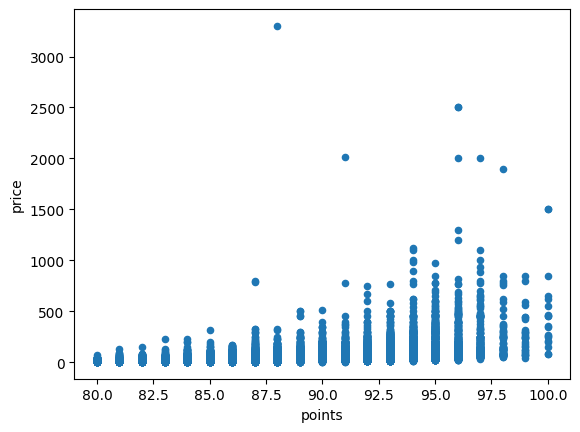

In [46]:
reviews.plot(kind="scatter", x="points", y="price")

## Pie plot
Pie plot is useful for showing what are the constituting groups.

Example: create a pie plot which shows how many wines from each country are included in the reviews dataframe.

<AxesSubplot: ylabel='country'>

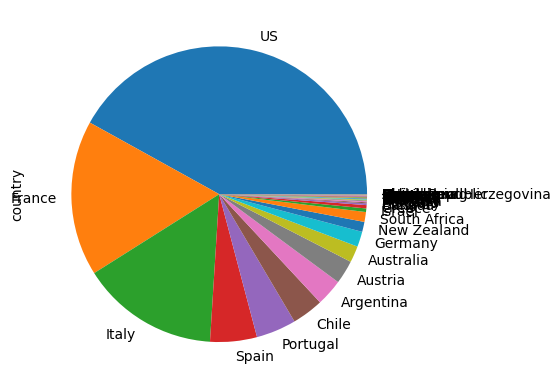

In [50]:
reviews.country.value_counts().plot(kind='pie')